In [ ]:
%matplotlib inline

<a href="https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/postprocessing/pimp_rgr_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Permutation Importance for categorical features


In [2]:

from ai4water import Model
from ai4water.utils.utils import get_version_info
from ai4water.datasets import mg_photodegradation
from ai4water.postprocessing.explain import PermutationImportance

In [3]:

for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [4]:
cat_map = {'Catalyst': list(range(9, 24)), 'Anions': list(range(24, 30))}
mg_data, cat_enc, an_enc = mg_photodegradation(encoding="ohe")
print(mg_data.shape)

(1200, 31)


In [5]:
model = Model(model="XGBRegressor", verbosity=0)

In [6]:
model.fit(data=mg_data)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=313,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
x, y = model.training_data(data=mg_data)

In [12]:
pimp = PermutationImportance(
    model.predict, 
    x, 
    y,
    save=False,
    cat_map=cat_map,
    feature_names=model.input_features,
    n_repeats=50)

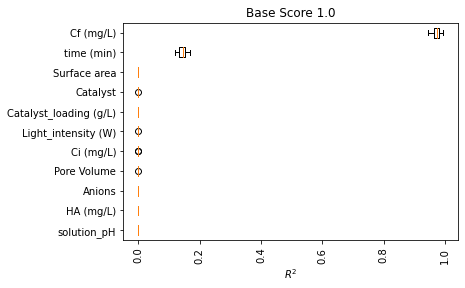

In [13]:
_ = pimp.plot_1d_pimp()

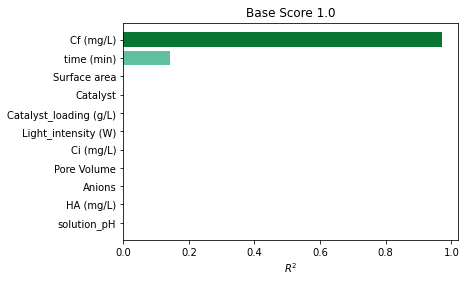

In [14]:
_ = pimp.plot_1d_pimp("barchart")